In [14]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [42]:
# Carregando os dados
df_ab_test = pd.read_csv("ab_test_ref.csv")
df_consumer = pd.read_csv("consumer.csv")
df_restaurant = pd.read_csv('restaurant.csv')

with open('transactions.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)
df['offer_id'] = df['value.offer_id'].combine_first(df['value.offer id'])
df['amount'] = df['value.amount']
df['reward'] = df['value.reward']
df = df.drop(columns=['value.offer id', 'value.offer_id', 'value.amount', 'value.reward'])
df = df.sort_values(by=['account_id', 'time_since_test_start'])

# Verificando as primeiras linhas
print(df_ab_test.head())
print(df_consumer.head())
print(df_restaurant.head())
print(df.head())

                                         customer_id is_target
0  755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...    target
1  b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...   control
2  d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...   control
3  6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...    target
4  dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...   control
                                         customer_id language  \
0  e8cc60860e09c0bb19610b06ced69c973eb83982cfc98e...    pt-br   
1  a2834a38a9876cf74e016524dd2e8c1f010ee12b2b684d...    pt-br   
2  41e1051728eba13341136d67d0757f8d8cc44b2a405b71...    pt-br   
3  8e7c1dcb64edf95c935147f6d560cb068c44714cb1b21b...    pt-br   
4  7823d4cf4150c5daeae0bd799206852fc123bdef0cf5d1...    pt-br   

                 created_at  active customer_name  customer_phone_area  \
0  2018-04-05T14:49:18.165Z    True          NUNO                   46   
1  2018-01-14T21:40:02.141Z    True      ADRIELLY                   59   
2  2018-0

In [54]:
df

,event,account_id,time_since_test_start,offer_id,amount,reward
55972,offer received,0009655768c64bdeb2e877511632db8f,7.00,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
77705,offer viewed,0009655768c64bdeb2e877511632db8f,8.00,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
89291,transaction,0009655768c64bdeb2e877511632db8f,9.50,None,22.16,NaN
113605,offer received,0009655768c64bdeb2e877511632db8f,14.00,3f207df678b143eea3cee63160fa8bed,NaN,NaN
139992,offer viewed,0009655768c64bdeb2e877511632db8f,15.50,3f207df678b143eea3cee63160fa8bed,NaN,NaN
...,...,...,...,...,...,...
258361,transaction,ffff82501cea40309d5fdd7edcca4a07,24.00,None,14.23,NaN
258362,offer completed,ffff82501cea40309d5fdd7edcca4a07,24.00,2906b810c7d4411798c6938adc9daaa5,NaN,2.0
262475,offer viewed,ffff82501cea40309d5fdd7edcca4a07,24.25,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
274809,transaction,ffff82501cea40309d5fdd7edcca4a07,25.25,None,10.12,NaN


In [47]:
# Quantos account_ids estão em df_ab_test?
matched_ids = df['account_id'].isin(df_ab_test['customer_id'])
print(f"IDs que batem: {matched_ids.sum()} de {len(df)} ({(matched_ids.sum()/len(df))*100:.2f}%)")

IDs que batem: 0 de 306534 (0.00%)


In [49]:
# Validação de dados
print("Exemplo do df (transações):", df['account_id'].dropna().unique()[:5])
print("Exemplo do df_ab_test:", df_ab_test['customer_id'].dropna().unique()[:5])

Exemplo do df (transações): ['0009655768c64bdeb2e877511632db8f' '00116118485d4dfda04fdbaba9a87b5c'
 '0011e0d4e6b944f998e987f904e8c1e5' '0020c2b971eb4e9188eac86d93036a77'
 '0020ccbbb6d84e358d3414a3ff76cffd']
Exemplo do df_ab_test: ['755e1fa18f25caec5edffb188b13fd844b2af8cf5adedcf77c028f36cb9382ea'
 'b821aa8372b8e5b82cdc283742757df8c45eecdd72adf411716e710525d4edf1'
 'd425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc007f5297541ec40b63b'
 '6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c8b535718bbc651ab02'
 'dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f5e3763fa657c23a58d']


account_id (32 caracteres)
customer_id (64 caracteres)

Não é possível unir transactions com df_ab_test ou df_consumer, pois os identificadores são diferentes e não existe uma chave comum para conectar esses dados.
Não é possível  avaliar o impacto da campanha sem comportamento de compra, sem essa correspondência entre os dados, não conseguimos responder às questões centrais do case (como retenção, ticket médio ou ROI da campanha).

In [19]:
# Unindo os dados com base em customer_id
df = pd.merge(df_ab_test, df_consumer, on="customer_id", how="inner")
print(df.head())


                                         customer_id is_target language  \
0  755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...    target    pt-br   
1  b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...   control    pt-br   
2  d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...   control    pt-br   
3  6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...    target    pt-br   
4  dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...   control    pt-br   

                 created_at  active customer_name  customer_phone_area  \
0  2018-04-06T02:48:42.887Z    True       MARCELO                   39   
1  2018-04-06T03:54:45.752Z    True       ANDREIA                   47   
2  2018-01-06T21:04:49.159Z    True        TAMARA                   65   
3  2018-01-07T21:15:11.762Z    True         ANDRE                   12   
4  2018-04-06T03:20:52.886Z    True        Cleusa                   59   

   customer_phone_number  
0              382036887  
1              271333951  
2              65020050

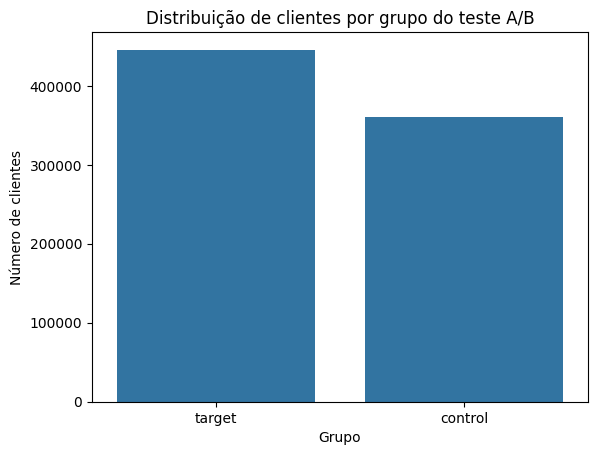

In [22]:
# Plotando distribuição de clientes por grupo
sns.countplot(data=df, x='is_target')
plt.title('Distribuição de clientes por grupo do teste A/B')
plt.xlabel('Grupo')
plt.ylabel('Número de clientes')
plt.show()


active     False   True 
is_target               
control      713  359700
target       882  444861


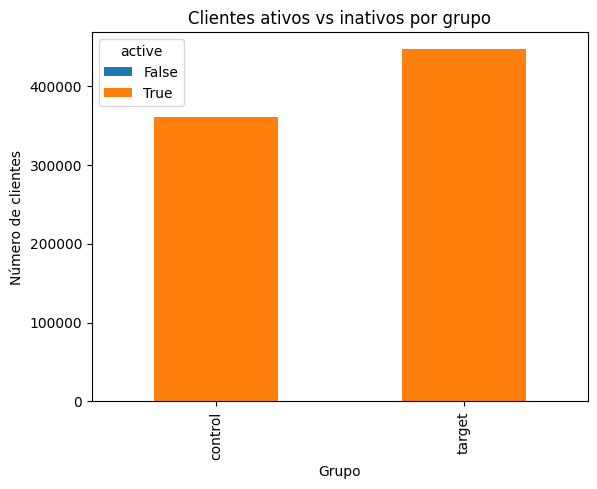

In [23]:
# Tabela de frequência
active_dist = df.groupby(['is_target', 'active']).size().unstack().fillna(0)
print(active_dist)

# Gráfico de barras
active_dist.plot(kind='bar', stacked=True)
plt.title('Clientes ativos vs inativos por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de clientes')
plt.show()


In [ ]:
# Configuração para gráficos 
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [70]:
# 3. Conversão de datas e criação de variável tempo na base
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_localize(None)
df['days_on_platform'] = (pd.to_datetime("2019-02-01") - df['created_at']).dt.days


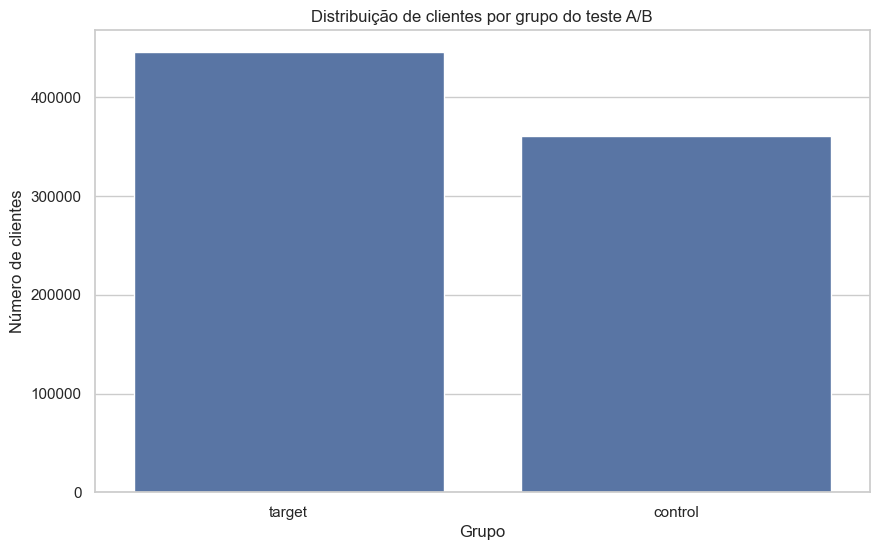

In [26]:
# A. Distribuição de clientes por grupo do teste A/B
plt.figure()
sns.countplot(data=df, x='is_target')
plt.title('Distribuição de clientes por grupo do teste A/B')
plt.xlabel('Grupo')
plt.ylabel('Número de clientes')
plt.show()

Distribuição clientes ativos/inativos por grupo:
 active     False   True 
is_target               
control      713  359700
target       882  444861


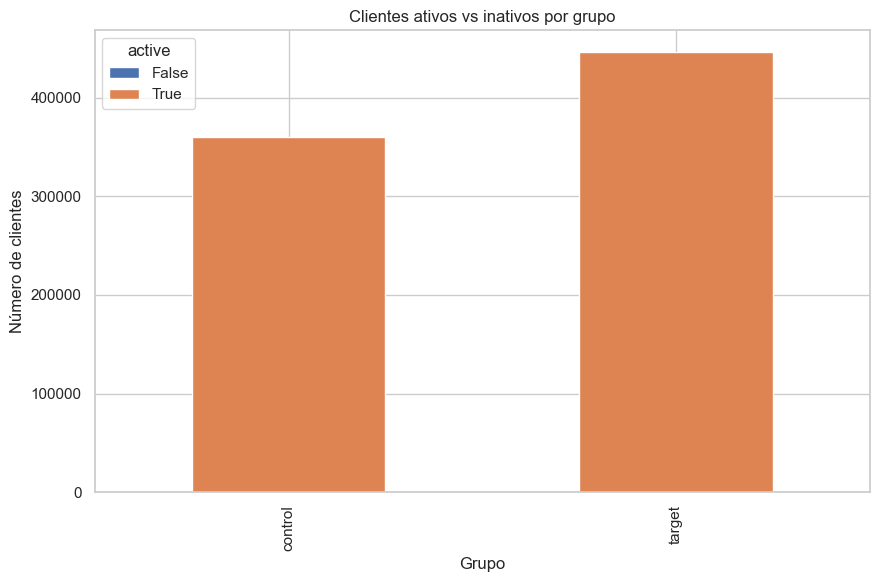

In [28]:
# B. Distribuição de clientes ativos vs inativos por grupo
active_dist = df.groupby(['is_target', 'active']).size().unstack().fillna(0)
print("Distribuição clientes ativos/inativos por grupo:\n", active_dist)

active_dist.plot(kind='bar', stacked=True)
plt.title('Clientes ativos vs inativos por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de clientes')
plt.show()

Distribuição de idiomas por grupo:
 language   es-ar   pt-br
is_target               
control        1  360412
target         1  445742


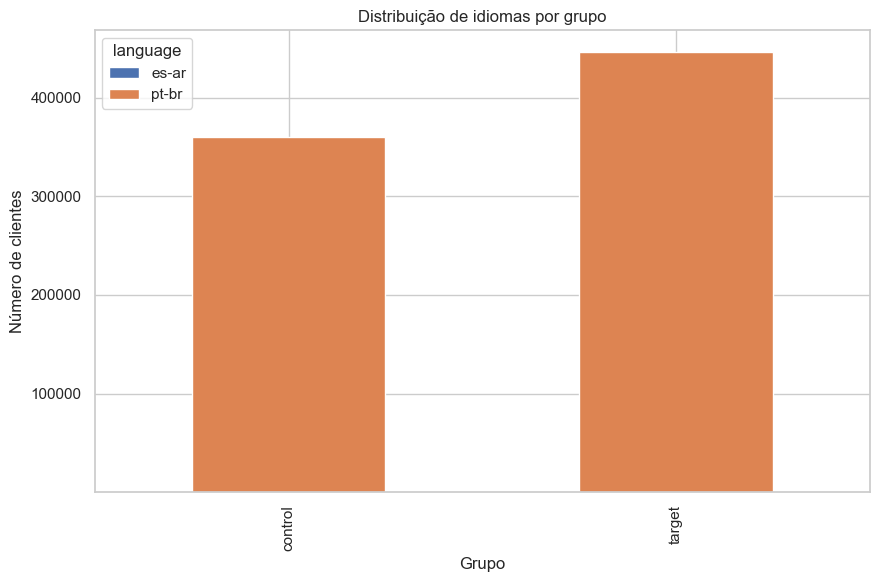

In [31]:
# C. Distribuição de idioma por grupo
lang_dist = df.groupby(['is_target', 'language']).size().unstack().fillna(0)
print("Distribuição de idiomas por grupo:\n", lang_dist)

lang_dist.plot(kind='bar', stacked=True)
plt.title('Distribuição de idiomas por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de clientes')
plt.show()

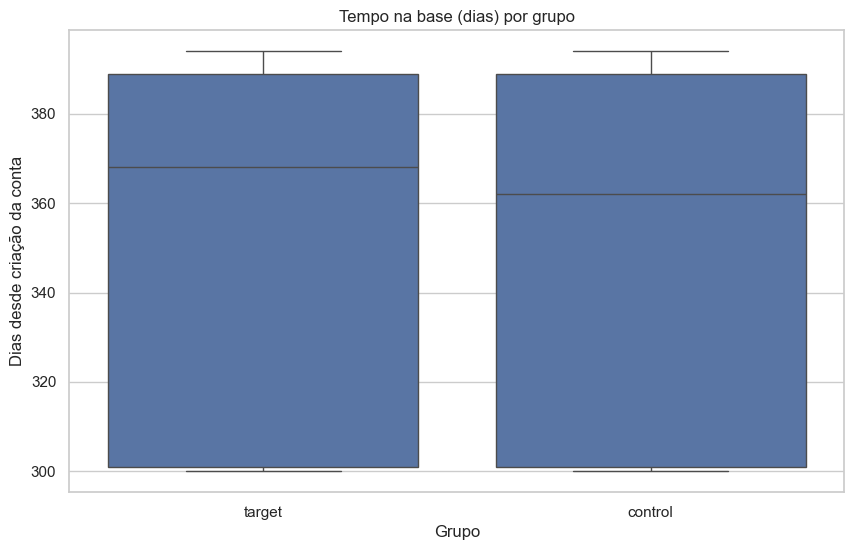

In [71]:
# D. Tempo na base por grupo (boxplot)
plt.figure()
sns.boxplot(data=df, x='is_target', y='days_on_platform')
plt.title('Tempo na base (dias) por grupo')
plt.xlabel('Grupo')
plt.ylabel('Dias desde criação da conta')
plt.show()

In [73]:
df.groupby('is_target')['days_on_platform'].median()

is_target
control    362.0
target     368.0
Name: days_on_platform, dtype: float64

Top 10 DDDs com mais clientes:
 customer_phone_area
60    8268
61    8223
56    8201
62    8199
12    8197
29    8189
88    8174
77    8171
81    8169
59    8160
Name: count, dtype: int64


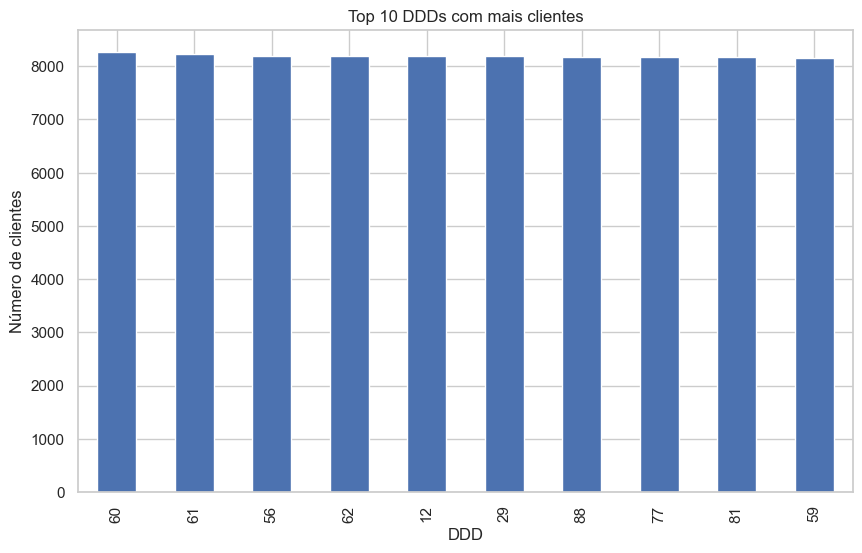

In [37]:
# E. Top 10 DDDs (customer_phone_area) com mais clientes
top_ddd = df['customer_phone_area'].value_counts().head(10)
print("Top 10 DDDs com mais clientes:\n", top_ddd)

top_ddd.plot(kind='bar')
plt.title('Top 10 DDDs com mais clientes')
plt.xlabel('DDD')
plt.ylabel('Número de clientes')
plt.show()

In [55]:
import pandas as pd
from datetime import datetime

In [56]:

# Juntar os dados pela coluna customer_id
df = df_ab_test.merge(df_consumer, on='customer_id')

In [58]:
# Garantir que ambas as datas são tz-naive
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_localize(None)
data_referencia = pd.to_datetime("2020-01-01")

In [59]:
# Calcular tempo de cadastro
df['tempo_cadastro_dias'] = (data_referencia - df['created_at']).dt.days

In [60]:

# Criar coluna de tempo de cadastro em dias
data_referencia = pd.to_datetime("2020-01-01")
df['created_at'] = pd.to_datetime(df['created_at'])
df['tempo_cadastro_dias'] = (data_referencia - df['created_at']).dt.days

In [64]:
df

,customer_id,is_target,language,created_at,active,customer_name,customer_phone_area,customer_phone_number,tempo_cadastro_dias
0,755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...,target,pt-br,2018-04-06 02:48:42.887,True,MARCELO,39,382036887,634
1,b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...,control,pt-br,2018-04-06 03:54:45.752,True,ANDREIA,47,271333951,634
2,d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...,control,pt-br,2018-01-06 21:04:49.159,True,TAMARA,65,650200505,724
3,6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...,target,pt-br,2018-01-07 21:15:11.762,True,ANDRE,12,84629429,723
4,dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...,control,pt-br,2018-04-06 03:20:52.886,True,Cleusa,59,628744222,634
...,...,...,...,...,...,...,...,...,...
806151,b204e707910c9d439f8a144c5799dfc0a34aa116c712c6...,target,pt-br,2018-04-06 04:00:47.944,True,Deme,70,109839574,634
806152,0eeea5f0ef562133be19c93f3c69ae5ef6bac970636605...,target,pt-br,2018-01-04 21:55:14.445,True,DAVID,93,125556009,726
806153,2c58fb2b18f606a19156d4e67d727109660701a112c0af...,target,pt-br,2018-01-05 22:05:31.168,True,TIAGO,30,150664610,725
806154,5d7242c38e0d2958810ca41c82fd734d2c80d11d03d2f7...,control,pt-br,2018-04-06 03:48:15.956,True,MARCEL,85,482169535,634


In [65]:
# Agrupamento por grupo de teste
grouped = df.groupby('is_target')

In [66]:
# Métricas por grupo
perfil = grouped.agg({
    'active': 'mean',
    'tempo_cadastro_dias': 'mean',
    'language': lambda x: (x == 'pt-BR').mean(),
    'customer_phone_area': lambda x: x.value_counts().index[0]  # DDD mais comum
}).rename(columns={
    'active': '% Ativos',
    'tempo_cadastro_dias': 'Tempo médio de cadastro (dias)',
    'language': '% PT-BR',
    'customer_phone_area': 'DDD mais comum'
})

In [67]:
# Formatar para porcentagens
perfil['% Ativos'] = (perfil['% Ativos'] * 100).round(2)
perfil['% PT-BR'] = (perfil['% PT-BR'] * 100).round(2)
perfil['Tempo médio de cadastro (dias)'] = perfil['Tempo médio de cadastro (dias)'].round(1)


In [69]:
# Adicionar coluna de diferença percentual
perfil_transposto = perfil.T
perfil_transposto['Diferença (%)'] = perfil_transposto['target'] - perfil_transposto['control']
perfil_transposto

is_target,control,target,Diferença (%)
% Ativos,99.8,99.8,0.0
Tempo médio de cadastro (dias),681.2,682.8,1.6
% PT-BR,0.0,0.0,0.0
DDD mais comum,60.0,58.0,-2.0


C:\Users\andre\AppData\Local\Temp\ipykernel_10208\3821083418.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores, y=plataformas, palette=colors, saturation=0.8)
C:\Users\andre\AppData\Local\Temp\ipykernel_10208\3821083418.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores, y=plataformas, palette=colors, saturation=0.8)
C:\Users\andre\AppData\Local\Temp\ipykernel_10208\3821083418.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores, y=plataformas, palette=colors, saturation=0.8)


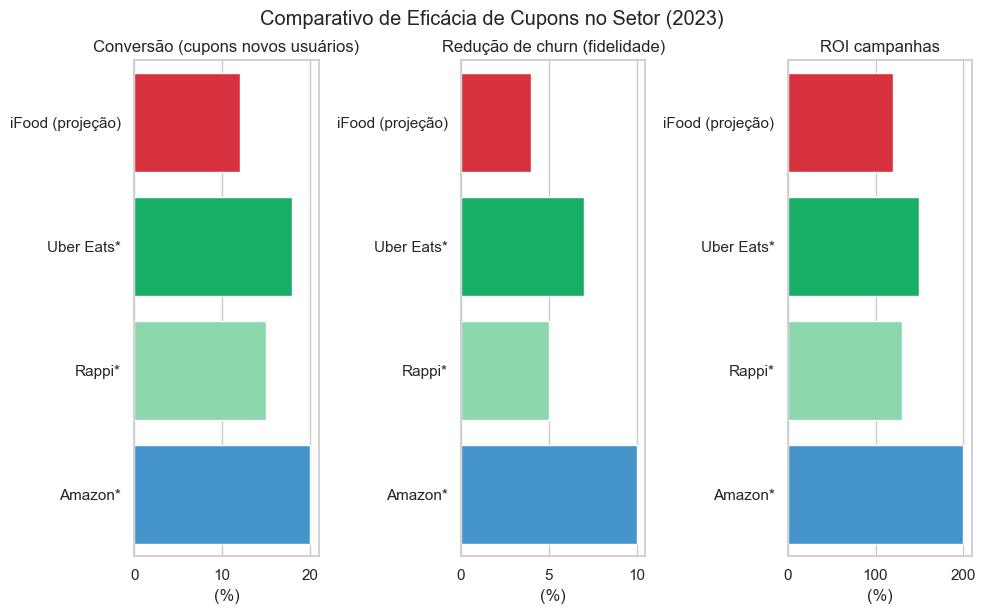

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fictícios baseados em relatórios do setor (2023)
plataformas = ["iFood (projeção)", "Uber Eats*", "Rappi*", "Amazon*"]
metricas = {
    'Conversão (cupons novos usuários)': [12, 18, 15, 20],  # %
    'Redução de churn (fidelidade)': [4, 7, 5, 10],         # %
    'ROI campanhas': [120, 150, 130, 200]                   # % (retorno por $1 investido)
}

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = ["#ea1d2c", "#06c167", "#82e0a9", "#3498db"]

for i, (metrica, valores) in enumerate(metricas.items()):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=valores, y=plataformas, palette=colors, saturation=0.8)
    plt.title(metrica)
    plt.xlabel("(%)")
    plt.gca().xaxis.grid(True)  
    
plt.tight_layout()
plt.suptitle("Comparativo de Eficácia de Cupons no Setor (2023)", y=1.02)
plt.show()